In [185]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_probability as tfp
from tensorflow_probability import edward2 as ed
tfd = tfp.distributions
import scipy.stats as st
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
import pandas as pd
%matplotlib inline



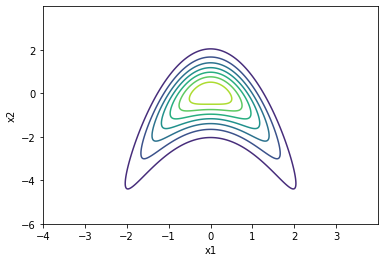

In [186]:
from scipy.stats import multivariate_normal

def plot_true():
    x, y = np.mgrid[-4:4:.01, -6:4:.01]
    pos = np.empty(x.shape + (2,)) 
    pos[:, :, 0] = x; pos[:, :, 1] = x**2+y
    rv = multivariate_normal([0, 0], [[1, 0], [0, 1]])
    plt.contour(x, y, rv.pdf(pos))
    plt.xlabel("x1")
    plt.ylabel("x2")
plot_true()

#### Sampling directly from the true posterior probability density

<b>HMC<b>

In [199]:
dtype = np.float32



true_mean = [0, 0]
true_cov = [[1, 0],
                 [0, 1]]
num_results = 1000
num_chains = 1


target = tfd.MultivariateNormalFullCovariance(loc=true_mean, covariance_matrix=true_cov)

# Assume that the state is passed as a list of 1-d tensors `x` and `y`.
# Then the target log-density is defined as follows:
def target_log_prob(x, y):
  # Stack the input tensors together
  z = tf.stack([x, x**2+y], axis=-1)
  return target.log_prob(tf.squeeze(z))

# Initial state of the chain
init_state = [-3.,
              -2.]

# Run Random Walk Metropolis with normal proposal for `num_results`
# iterations for `num_chains` independent chains:
samples, kernel_results = tfp.mcmc.sample_chain(
    num_results=num_results,
    current_state=init_state,
    kernel=tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=target_log_prob,
        step_size = 0.1,
        num_leapfrog_steps = 5),
    num_burnin_steps=500,
    num_steps_between_results=1,  # Thinning.
    parallel_iterations=1)
samples = tf.stack(samples, axis=-1)

accepted = kernel_results.is_accepted

samples = samples.numpy()
accepted = accepted.numpy()



/Users/zhouji/.local/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


In [200]:
x1 = samples[:,0]
y1 = samples[:,1]

Acceptance rate: 99.3%


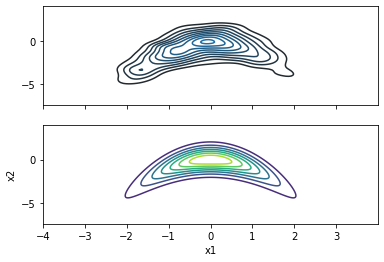

In [201]:
## plot the result
x_accepted = []
y_accepted =[]
for i in range(accepted.shape[0]):
    if accepted[i-1]==True:
        x_accepted = np.append(x_accepted,samples[i-1,0])
        y_accepted = np.append(y_accepted,samples[i-1,1])
f,(ax1,ax2) = plt.subplots(2,1,sharex =True, sharey = True)

sns.kdeplot(x_accepted,y_accepted,ax=ax1)
plot_true()

print('Acceptance rate: %0.1f%%' % (100*(x_accepted.shape[0]/num_results)))


<b>RMHMC<b>

In [206]:
dtype = np.float32

true_mean = [0, 0]
true_cov = [[1, 0],
                 [0, 1]]
num_results = 2000
num_chains = 1


target = tfd.MultivariateNormalFullCovariance(loc=true_mean, covariance_matrix=true_cov)

# Assume that the state is passed as a list of 1-d tensors `x` and `y`.
# Then the target log-density is defined as follows:
def target_log_prob(x, y):
  # Stack the input tensors together
    z = tf.stack([x, x**2+y], axis=-1)
    return target.log_prob(tf.squeeze(z))

# Initial state of the chain
init_state = [-3.,
              -4.]

# Run Random Walk Metropolis with normal proposal for `num_results`
# iterations for `num_chains` independent chains:
samples, kernel_results = tfp.mcmc.sample_chain(
    num_results=num_results,
    current_state=init_state,
    kernel=tfp.mcmc.RandomWalkMetropolis(
        target_log_prob_fn=target_log_prob),
    num_burnin_steps=500,
    num_steps_between_results=1,  # Thinning.
    parallel_iterations=1)
samples = tf.stack(samples, axis=-1)
accepted = kernel_results.is_accepted

samples = samples.numpy()
accepted = accepted.numpy()


# print('Estimated mean: {}'.format(mean_sample_mean))
# print('Estimated avg covariance: {}'.format(mean_sample_cov))
# print('Estimated covariance of covariance: {}'.format(cov_sample_cov))

/Users/zhouji/.local/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


Acceptance rate: 48.7%


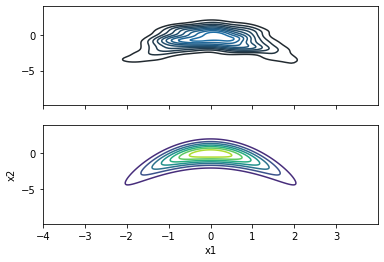

In [207]:
##plot the result
x_accepted = []
y_accepted =[]
for i in range(accepted.shape[0]):
    if accepted[i-1]==True:
        x_accepted = np.append(x_accepted,samples[i-1,0])
        y_accepted = np.append(y_accepted,samples[i-1,1])
        
f,(ax1,ax2) = plt.subplots(2,1,sharex =True, sharey = True)

sns.kdeplot(x_accepted,y_accepted,ax=ax1)
plot_true()

print('Acceptance rate: %0.1f%%' % (100*(x_accepted.shape[0]/num_results)))

/Users/zhouji/anaconda3/envs/Bayes/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  after removing the cwd from sys.path.


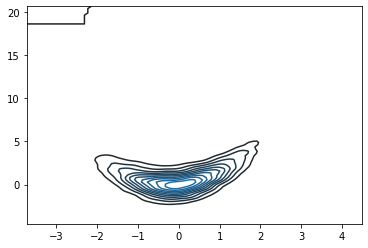

In [106]:
mean = [0, 0]
cov = [[1, 0.9], [0, 0.9]] 

x1, x2 = np.random.multivariate_normal(mean, cov, 10000).T
y1 = x1
y2 = x2+x1**2

sns.kdeplot(y1,y2)


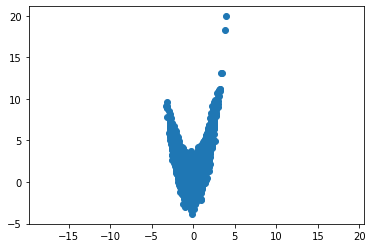

In [107]:
plt.plot(y1, y2,'o')
plt.axis('equal')
plt.show()

### Visual in 3D

In [16]:
x = y1
y = y2
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-4.764021915305278 4.6388922007181534 -5.492587674266364 17.992659199660945


In [50]:
f.shape

(100, 100)

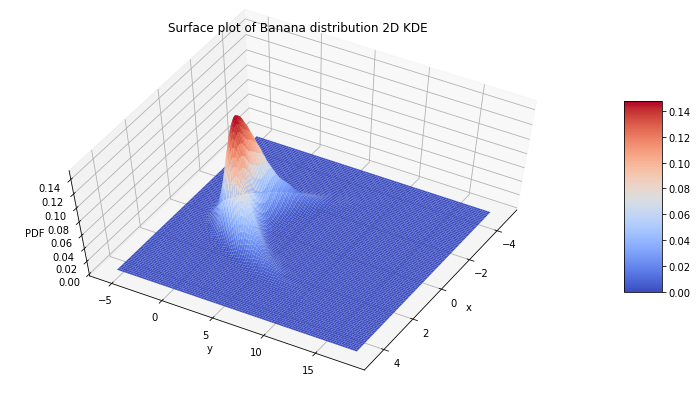

In [17]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

fig = plt.figure(figsize=(13, 7))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title('Surface plot of Banana distribution 2D KDE')
fig.colorbar(surf, shrink=0.5, aspect=5) # add color bar indicating the PDF
ax.view_init(60, 30)

In [42]:
f

array([[1.64866441e-074, 8.10679832e-073, 2.50332682e-071, ...,
        1.07115465e-023, 2.64257050e-026, 4.07766369e-029],
       [1.80487793e-071, 9.66487515e-070, 3.24408193e-068, ...,
        1.96594403e-022, 5.28349903e-025, 8.88142255e-028],
       [1.56757377e-068, 9.14232730e-067, 3.33946779e-065, ...,
        2.86242710e-021, 8.38032762e-024, 1.53460984e-026],
       ...,
       [8.57573515e-122, 5.87374526e-117, 2.56751373e-112, ...,
        7.11471858e-009, 4.92878458e-010, 2.16036339e-011],
       [4.85112005e-126, 3.65529253e-121, 1.77352994e-116, ...,
        2.40190417e-009, 1.79789209e-010, 8.51944617e-012],
       [2.18832979e-130, 1.81698889e-125, 1.00187618e-120, ...,
        6.46963224e-010, 5.23113772e-011, 2.67879515e-012]])

Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

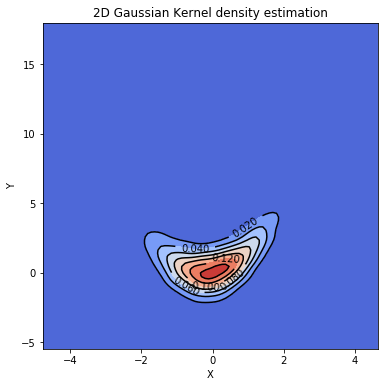

In [18]:
fig = plt.figure(figsize=(6,6))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
# ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

In [26]:
x1= pd.DataFrame(np.arange(-2,2,0.1))
x2= pd.DataFrame(np.arange(-2,2,0.1))
x1,x2 = np.meshgrid(x1,x2)

x_1 = pd.DataFrame(norm.pdf(x1,0,1))
x_2 = pd.DataFrame(norm.pdf(x2,0,1))

y = x_1*x_2



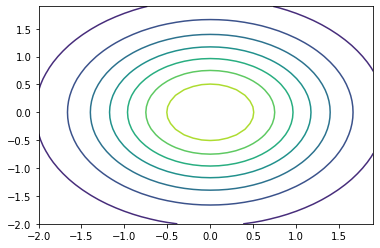

In [27]:
plt.contour(x1,x2,y)

In [28]:
x1,x2 = np.random.multivariate_normal([0,0], [[1,0],[0,1]], 10000).T


In [29]:
#Random Walk MH MCMC
@tf.function
def draw_proposal(m_current):
    
    Xi = tfd.MultivariateNormalFullCovariance(
            loc = m_current,
            covariance_matrix= [[1.,0.],[0.,1.]])
    Xi_s = tfd.Sample(Xi)
    m_proposed = Xi_s.sample()
    return m_proposed
    

def accept_or_not(m_current,m_proposed):
    if not isinstance(m_current,list):m_current = m_current.tolist()
    if not isinstance(m_proposed,list):m_proposed = m_proposed.tolist()
    
    p_accept = rv.pdf([m_proposed[0],m_proposed[0]**2+m_proposed[1]])/rv.pdf([m_current[0],m_current[0]**2+m_current[1]])
    a = np.random.rand()
    accept = a < p_accept
    
#     print("random number =",a)
#     print("probability to accept",p_accept)
    
    return accept

        

In [39]:
rv = multivariate_normal([0, 0], [[1, 0], [0, 0.3]])
def chain(step = 100):
    resultlist=[]
    initial = [-2, -4]
    m_current = initial
    for s in range(step):
        m_proposed = draw_proposal(m_current)
        m_proposed = m_proposed.numpy()
        accept = accept_or_not(m_current,m_proposed)
        if accept:
            resultlist.append([m_proposed,1])
            m_current = m_proposed
        else:
            resultlist.append([m_proposed,0])
        
    return resultlist

In [40]:
result = chain()

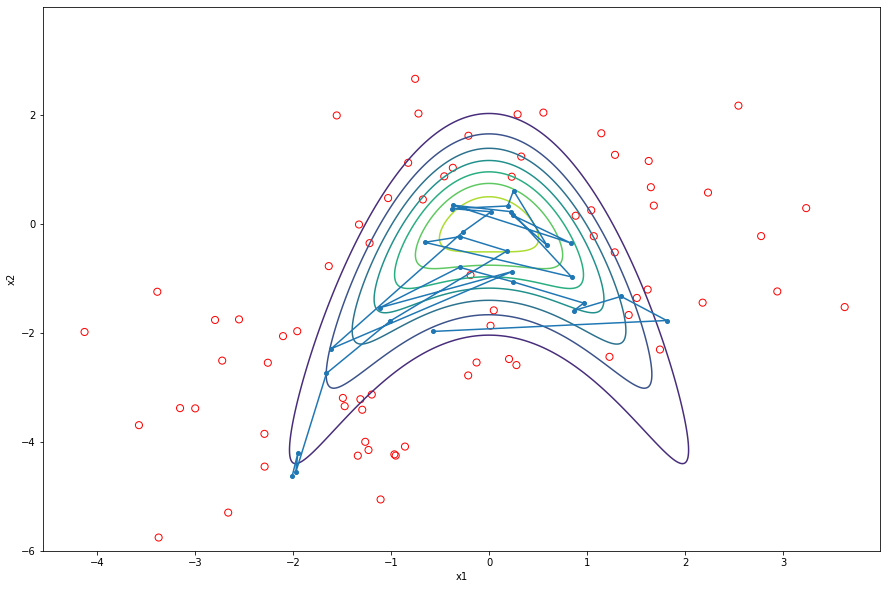

In [208]:
def chain_plot(result):
    chain = [result[i][0] for i in range(np.shape(result)[0])]
    x1 = [chain[i][0] for i in range(np.shape(chain)[0])]
    y1 = [chain[i][1] for i in range(np.shape(chain)[0])]
    re = pd.DataFrame(result)
    accept_point = re[1]==1
    reject_point = re[1]==0
    df_accept = pd.DataFrame(re[accept_point][0].values.tolist(), index = re[accept_point].index)
    df_reject = pd.DataFrame(re[reject_point][0].values.tolist(), index = re[reject_point].index)

    plt.figure(figsize=(15,10))
    plt.plot(df_accept[0],df_accept[1],'-o',markersize=4)
    plt.scatter(df_reject[0],df_reject[1], s=50, facecolors='none', edgecolors='r')

#     plt.contour(x, y, rv.pdf(pos))
    plot_true()
chain_plot(result)

<b>In an inference framework<b>

https://rss.onlinelibrary.wiley.com/doi/full/10.1111/j.1467-9868.2010.00765.x

In [212]:
# generate some observations
c = 0
y = tf.random.normal([100],mean = 0,stddev = 1)
y

<tf.Tensor: id=38813176, shape=(100,), dtype=float32, numpy=
array([ 0.38504556, -0.4211764 , -2.197105  ,  0.51998603,  1.2700384 ,
        2.198769  ,  0.0076498 ,  0.46379212,  1.1276425 ,  0.10946347,
        1.3064808 ,  0.01426329,  0.218401  ,  0.4818616 ,  0.26904398,
       -1.6279616 , -0.65163916, -0.49583563,  0.69523376,  0.6564589 ,
       -1.1640567 , -0.05431587,  1.3472222 , -0.01373517,  2.0087657 ,
        1.1269355 ,  1.3225611 , -0.8891897 ,  0.4151976 , -0.1341487 ,
        1.4584069 ,  0.21748982,  0.6760784 , -0.48272884,  0.4577989 ,
        0.3310016 , -0.82528985,  0.6574064 , -0.01149573,  1.4672477 ,
        0.07660997, -0.34762877,  0.78654927, -0.62328005,  0.11834204,
       -0.9194513 , -0.27788696, -1.1931242 ,  1.68191   , -1.8463036 ,
       -0.7710432 ,  0.83335435,  0.8904871 ,  0.31006494,  1.3405367 ,
       -0.18201765, -0.5788071 , -0.23779042, -0.40700516, -0.4761896 ,
       -0.6644994 , -1.1379687 ,  1.2456236 , -0.5578867 ,  0.7609907 ,
   

In [158]:
# create a log-likelihood function
def log_likelihood():
    #define the prior
    theta1 = ed.Normal(loc=0, scale=1, name="theta1")
    theta2 = ed.Normal(loc=0, scale=1, name="theta2")
    
    y = tf.random.normal([100],mean = theta1+tf.pow(theta2,2),stddev = 1)

    return y

# set initial state (drawn from prior)
qtheta1 = -4*tf.ones([], dtype=tf.float32)
qtheta2 = -4*tf.ones([], dtype=tf.float32)


In [181]:
log_joint = ed.make_log_joint_fn(log_likelihood)

def target_log_prob_fn(theta1,theta2):
    return log_joint(theta1 = theta1, theta2 = theta2, y=y)

Nsamples = 5000  # final number of samples
Nburn = 100   # number of tuning samples



In [182]:
samples, kernel_results = tfp.mcmc.sample_chain(
    num_results=Nsamples,
    current_state=[qtheta1, qtheta2],
    kernel=tfp.mcmc.RandomWalkMetropolis(
        target_log_prob_fn=target_log_prob),
    num_burnin_steps=Nburn,
    num_steps_between_results=1,  # Thinning.
    parallel_iterations=1)
samples = tf.stack(samples, axis=-1)

accepted = kernel_results.is_accepted
samples = samples.numpy()
accepted = accepted.numpy()

/Users/zhouji/.local/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


Acceptance rate: 47.0%


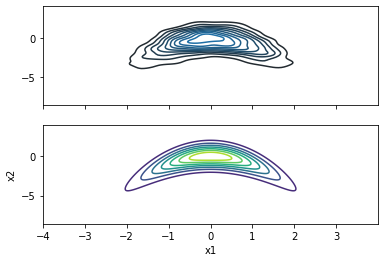

In [183]:

x1 = samples[:,0]
y1 = samples[:,1]

x_accepted = []
y_accepted =[]
for i in range(accepted.shape[0]):
    if accepted[i-1]==True:
        x_accepted = np.append(x_accepted,samples[i-1,0])
        y_accepted = np.append(y_accepted,samples[i-1,1])
        
f,(ax1,ax2) = plt.subplots(2,1,sharex =True, sharey = True)

sns.kdeplot(x_accepted,y_accepted,ax=ax1)

plot_true()
print('Acceptance rate: %0.1f%%' % (100*(x_accepted.shape[0]/Nsamples)))

In [179]:
# set up Hamiltonian MC
hmc_kernel = tfp.mcmc.HamiltonianMonteCarlo(
    target_log_prob_fn=target_log_prob_fn,
    step_size=0.1,
    num_leapfrog_steps=5)

states, kernel_results = tfp.mcmc.sample_chain(
    num_results=Nsamples,
    num_burnin_steps=Nburn,
    current_state=[qtheta1, qtheta2],
    kernel=hmc_kernel)


/Users/zhouji/.local/lib/python3.7/site-packages/tensorflow_probability/python/mcmc/sample.py:335: UserWarning: Tracing all kernel results by default is deprecated. Set the `trace_fn` argument to None (the future default value) or an explicit callback that traces the values you are interested in.
  warnings.warn("Tracing all kernel results by default is deprecated. Set "


Acceptance rate: 100.0%


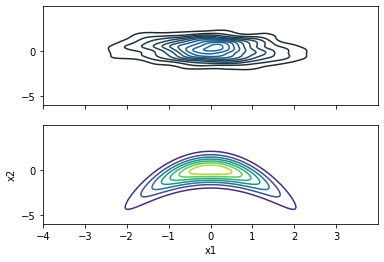

In [180]:
a = kernel_results.is_accepted
samples = tf.stack(states, axis=-1)
samples = samples.numpy()
accepted = a.numpy()

x1 = samples[:,0]
y1 = samples[:,1]

x_accepted = []
y_accepted =[]
for i in range(accepted.shape[0]):
    if accepted[i-1]==True:
        x_accepted = np.append(x_accepted,samples[i-1,0])
        y_accepted = np.append(y_accepted,samples[i-1,1])
f,(ax1,ax2) = plt.subplots(2,1,sharex =True, sharey = True)
sns.kdeplot(x_accepted,y_accepted,ax=ax1)

plot_true()
print('Acceptance rate: %0.1f%%' % (100*(x_accepted.shape[0]/Nsamples)))


In [216]:
theta1 = np.random.uniform(low = -2, high = 2, size = 100)
c = 0
theta2 = c - theta1**2 
theta2

array([-1.00600431e+00, -2.61471208e+00, -1.16909750e-01, -9.59829690e-02,
       -1.57017347e+00, -2.59203616e+00, -6.48256527e-01, -7.05100875e-01,
       -5.75929273e-01, -3.92993099e+00, -3.31156693e+00, -2.77168103e+00,
       -1.66301549e+00, -1.75803864e+00, -1.55467245e+00, -6.87594380e-01,
       -7.97167489e-02, -9.63785432e-01, -3.19244580e+00, -3.87367705e-01,
       -1.05823442e+00, -4.06115647e-01, -2.95763767e-04, -3.62884651e+00,
       -3.24023275e-01, -1.29437100e-01, -5.23092194e-01, -3.55032367e+00,
       -1.29616722e-02, -1.44444733e-02, -1.30299263e+00, -2.38369642e+00,
       -2.58184924e-01, -3.69834320e-03, -8.62429059e-01, -1.29091763e+00,
       -1.07838234e+00, -2.37735125e-03, -1.43107217e-01, -8.83960903e-01,
       -1.77166194e+00, -3.84964502e+00, -2.33635545e+00, -3.10498350e+00,
       -5.85722429e-02, -2.66584934e+00, -5.77314424e-01, -1.40899930e-02,
       -1.72082281e+00, -1.43332847e+00, -2.17192503e-01, -2.39505101e+00,
       -3.06771055e-01, -